## looking at different ways to deal with survival analysis
# HR SEPARATION
DECEMBER 31, 2015

In [4]:
### load the basic files
import os,subprocess,sys
import pandas as pd
import numpy as np
%matplotlib inline
from datetime import datetime
import matplotlib.pyplot as plt
from itertools import chain
import random
import seaborn as sns
from glob import glob
plt.style.use('ggplot')
from sklearn import cross_validation

In [5]:
os.chdir('../../../projects/HRattrition/reduced')

In [6]:
em2002 = pd.read_csv('after2001_v3.csv',dtype={'EEO1CODE':np.str,'EMPL_CLASS':np.str})
print em2002.shape
all_cols = em2002.columns.tolist()

(134266, 69)


In [7]:
os.chdir('../../../../code/')
import bear.bear as br
os.chdir('../Documents/projects/HRattrition/reduced')


In [8]:
col_categorical = br.get_categorical(em2002)

In [9]:
col_numeric = br.get_numeric(em2002)
print len(col_categorical),len(col_numeric)

14 55


In [10]:
for c in col_categorical: #cat_cols:
    nobs = len(em2002[c].unique())
    #if nobs == 2:
        #indicator_cols.append(c)
    #else:
    print c, nobs
    #    cat_cols2.append(c)
print "============"
numeric_to_categorical = ['COMPANY','DIVISION_CODE_SFI','ETHNIC_GROUP','EXT_FUNC_ID_SFI','FUNC_ID_SFI','JOBCODE']
for c in numeric_to_categorical:
    print c, len(em2002[c].unique())

EEO1CODE 10
birth_tstmp 20171
FULL_PART_TIME 4
EMPL_CLASS 6
FLSA_STATUS 3
LOC_STATE 52
GRADE 125
JOB_FAMILY 1448
hire_tstmp 8881
LOCATION 13030
term_tstmp 4353
JOB_FUNCTION 19
EMPL_TYPE 5
LOC_TYPE_DESCR_SFI 31
COMPANY 6
DIVISION_CODE_SFI 9
ETHNIC_GROUP 8
EXT_FUNC_ID_SFI 338
FUNC_ID_SFI 53
JOBCODE 2589


C:\Anaconda\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


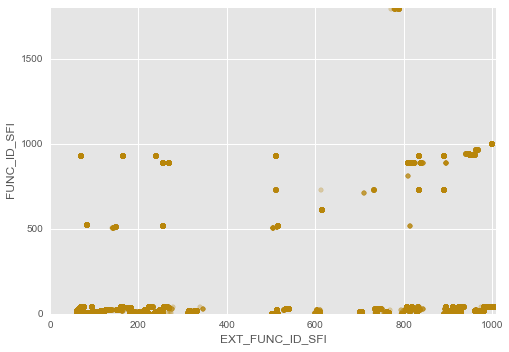

In [11]:
#xvals = em2002.EXT_FUNC_ID_SFI.values.unique()

plt.scatter(em2002.EXT_FUNC_ID_SFI.values,em2002.FUNC_ID_SFI.values,alpha=0.3,color='darkgoldenrod')
plt.xlim(0,1010)
plt.ylim(0,1810)
plt.xlabel('EXT_FUNC_ID_SFI')
plt.ylabel('FUNC_ID_SFI')


In [12]:
em2002.EXT_FUNC_ID_SFI.nunique(), em2002.FUNC_ID_SFI.nunique()

(338, 53)

In [13]:
em2002.JOBCODE.nunique(), em2002.JOBCODE.max()

(2589, 9999)

In [14]:
unique_jobcodes = em2002.JOBCODE.unique().tolist()
unique_jobcodes.sort()
unique_jobcodes[-10:]

[9944L, 9945L, 9949L, 9964L, 9965L, 9968L, 9972L, 9973L, 9974L, 9999L]

## December 31, 2015

* The extended Functions (EXT_FUNC_ID_SFI) Jeff Briks is interested in are:
    * CCC Sales (00892)
    * CCC Service (00071)
    * Life Health Response Center (00816)
    * Enterprise Auto Express (00909)
    * Enterprise ILR (00910)
    * State Farm Bank (00517)
    * SFPP (00835)
* The jobs (JOBCODES) he is interested in are these:
    * CCC Service Rep (6200)
    * CCC Sales Rep (1876)
    * Life Customer Service Asst (2638, 2639, & 2641)
    * Claim Associate-Express (0983 & 0984)
    * Claim Associate-ILR (1009)
    * Claim Team Manager – ILR (0986)
    * Bank Customer Service Rep (0851, 852, & 0853)
    * SFPP Account Rep (4105)

I need to make sure that I keep these columns around



In [15]:
#interesting_extended_functions = [892,71, 816, 909,910,517,835]
extFuncDict ={}
extFuncDict[892]='CCC Sales'
extFuncDict[71]='CCC Service'
extFuncDict[816]='Life Health Response Center'
#(00816)
extFuncDict[909]='Enterprise Auto Express'
extFuncDict[910]='Enterprise ILR' 
extFuncDict[517]='State Farm Bank'
extFuncDict[835]='SFPP'
interesting_extended_functions = extFuncDict.keys()
extFuncDict

{71: 'CCC Service',
 517: 'State Farm Bank',
 816: 'Life Health Response Center',
 835: 'SFPP',
 892: 'CCC Sales',
 909: 'Enterprise Auto Express',
 910: 'Enterprise ILR'}

In [71]:
from lifelines import KaplanMeierFitter
kmf=KaplanMeierFitter()


kmf.fit(em2002['Tenure_years'],event_observed=em2002['former'],label='all')
    #survivalfunc_df = pd.DataFrame(kmf.survival_function_)

<lifelines.KaplanMeierFitter: fitted with 134266 observations, 84592 censored>

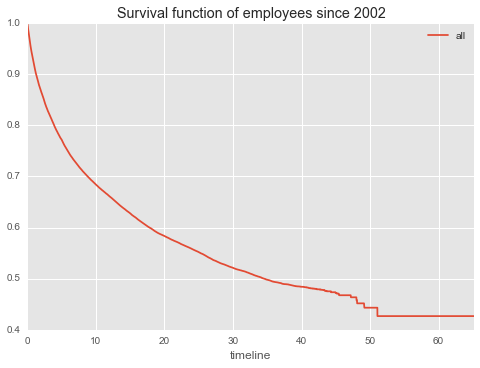

In [17]:
kmf.survival_function_.plot()
plt.title('Survival function of employees since 2002');

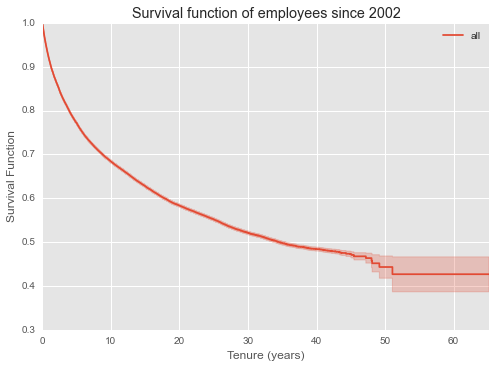

In [72]:
kmf.plot()
plt.title('Survival function of employees since 2002')
plt.xlabel('Tenure (years)')
plt.ylabel('Survival Function');

In [73]:
kmf.median_

34.532511978099997

In [76]:
kmf.survival_function_[(kmf.survival_function_<0.5).values]

,all
timeline,
34.532512,0.499986
34.535250,0.499986
34.537988,0.499986
34.540726,0.499986
34.543463,0.499986
34.546201,0.499877
34.548939,0.499877
34.554415,0.499877
34.557153,0.499877


## now explore the differences between these EXT_FUNC_ID_SFI values

In [20]:
T = em2002['Tenure_years'] #duration
C = em2002['former'] # observation

In [21]:
extFuncDict.items()

[(835, 'SFPP'),
 (517, 'State Farm Bank'),
 (71, 'CCC Service'),
 (909, 'Enterprise Auto Express'),
 (910, 'Enterprise ILR'),
 (816, 'Life Health Response Center'),
 (892, 'CCC Sales')]

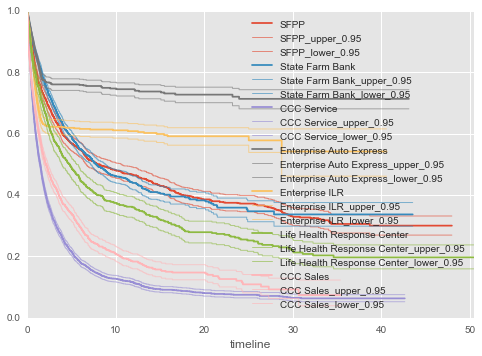

In [22]:
ax=plt.subplot(111)
#gp = []
#gpName=[]
#[gpName.append(v) for v in extFuncDict.itervalues()]
for k,v in extFuncDict.items():
    gp=(em2002['EXT_FUNC_ID_SFI']==k)
    #gpName.append(v)
    kmf.fit(T[gp],event_observed=C[gp],label=v)
    kmf.plot(ax=ax,ci_force_lines=True)

Median survival tenure of SFPP is : 8.14784394251
Median survival tenure of State Farm Bank is : 7.77275838467
Median survival tenure of CCC Service is : 1.45927446954
Median survival tenure of Enterprise Auto Express is : inf
Median survival tenure of Enterprise ILR is : inf
Median survival tenure of Life Health Response Center is : 4.79397672827
Median survival tenure of CCC Sales is : 2.09993155373


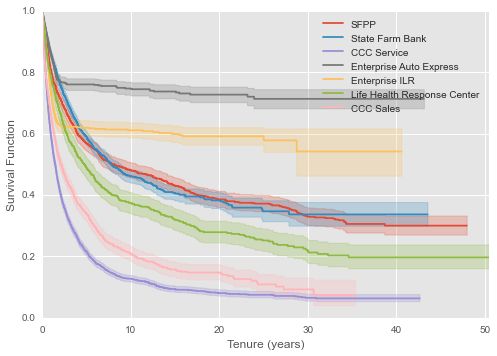

In [77]:
ax = plt.subplot(111)

t = np.linspace(0,50,51)
for k,v in extFuncDict.items():
    gp=(em2002['EXT_FUNC_ID_SFI']==k)
    #gpName.append(v)
    kmf.fit(T[gp],event_observed=C[gp],label=v)
    kmf.plot(ax=ax)
    
    print "Median survival tenure of {0} is : {1}".format(v,kmf.median_)


plt.ylim(0,1)
plt.xlabel('Tenure (years)')
plt.ylabel('Survival Function')
#plt.title("Lifespans of different global regimes");

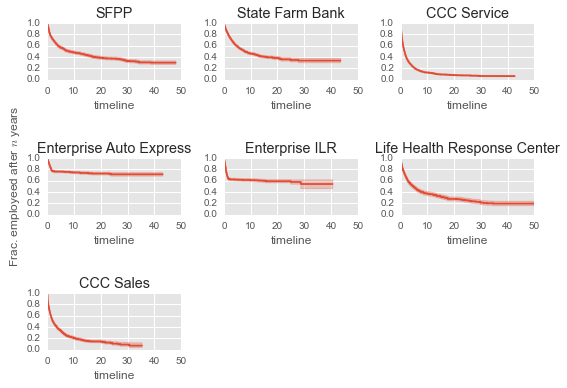

In [24]:
#regime_types = data['regime'].unique()
i=0
for k,v in extFuncDict.items():
    ax = plt.subplot(3,3,i+1)
    ix = em2002['EXT_FUNC_ID_SFI'] == k
    kmf.fit( T[ix], C[ix], label=v )
    kmf.plot(ax=ax, legend=False)
    plt.title(v)
    plt.xlim(0,50)
    plt.ylim(0,1.0)
    if i==3:
        plt.ylabel('Frac. employeed after $n$ years')
    i+=1
plt.tight_layout()

In [79]:
extFuncDict.items()

[(835, 'SFPP'),
 (517, 'State Farm Bank'),
 (71, 'CCC Service'),
 (909, 'Enterprise Auto Express'),
 (910, 'Enterprise ILR'),
 (816, 'Life Health Response Center'),
 (892, 'CCC Sales')]

In [26]:
em2002.EXT_FUNC_ID_SFI.value_counts()[extFuncDict.keys()]

835    1991
517    2936
71     6536
909    3193
910    3278
816    1045
892    3364
Name: EXT_FUNC_ID_SFI, dtype: int64

### similarly explore the JOBCODES of interest

In [82]:
interesting_jobs_name_list = ['CCC Service Rep', 'CCC Sales Rep', 'Life Customer Service Asst', 
                             'Claim Associate-Express','Claim Associate-ILR','Claim Team Manager-ILR',
                             'Bank Customer Service Rep','SFPP Account Rep']
invJobCodeDict = {}
invJobCodeDict['CCC Service Rep'] = [6200]
invJobCodeDict['CCC Sales Rep'] = [1876]
invJobCodeDict['Life Customer Service Asst'] = [2638,2639,2641]
invJobCodeDict['Claim Associate-Express'] = [983,984]
invJobCodeDict['Claim Associate-ILR'] = [1009]
invJobCodeDict['Claim Team Manager-ILR'] = [986]
invJobCodeDict['Bank Customer Service Rep'] = [851,852,853]
invJobCodeDict['SFPP Account Rep'] = [4105]#2638,2639,2641]



Median survival tenure of CCC Service Rep is : 1.17453798768
Median survival tenure of Claim Associate-ILR is : 1.61259411362
Median survival tenure of Claim Team Manager-ILR is : inf
Median survival tenure of CCC Sales Rep is : 1.73032169747
Median survival tenure of Claim Associate-Express is : 23.9260780287
Median survival tenure of SFPP Account Rep is : 0.881587953457
Median survival tenure of Life Customer Service Asst is : 7.1485284052
Median survival tenure of Bank Customer Service Rep is : 3.24161533196


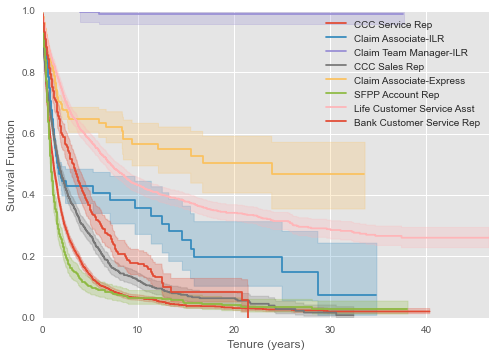

In [85]:
ax=plt.subplot(111)
#gp = []
#gpName=[]
#[gpName.append(v) for v in extFuncDict.itervalues()]
for k,v in invJobCodeDict.items():
    gp=(em2002['JOBCODE'].isin(v))
    #gpName.append(v)
    kmf.fit(T[gp],event_observed=C[gp],label=k)
    kmf.plot(ax=ax)
    print "Median survival tenure of {0} is : {1}".format(k,kmf.median_)
    
plt.ylim([0,1])
plt.xlabel('Tenure (years)')
plt.ylabel('Survival Function')

In [86]:
for k,v in invJobCodeDict.items():
    gp=(em2002['JOBCODE'].isin(v))
    print k, sum(gp)

CCC Service Rep 5857
Claim Associate-ILR 2818
Claim Team Manager-ILR 211
CCC Sales Rep 3161
Claim Associate-Express 2618
SFPP Account Rep 845
Life Customer Service Asst 1895
Bank Customer Service Rep 576


## return to my idea of reducing this based upon some threshhold value

In [27]:
em2002.EXT_FUNC_ID_SFI.value_counts()[extFuncDict.keys()]/len(em2002)

835    0.014829
517    0.021867
71     0.048679
909    0.023781
910    0.024414
816    0.007783
892    0.025055
Name: EXT_FUNC_ID_SFI, dtype: float64

In [28]:
sum(em2002.EXT_FUNC_ID_SFI.value_counts()>=1000)#/len(em2002)>0.005)

28

In [29]:
0.007*len(em2002)

939.862

In [30]:
em2002.EXT_FUNC_ID_SFI.value_counts()[em2002.EXT_FUNC_ID_SFI.value_counts()<1000].sum()/float(len(em2002))

0.3465359808142046

## split em2002 into test-train split

In [31]:
# repeat the split

# break into evaluation and build sets
print "Starting with subset of {0} employees.".format(len(em2002))
eval_fraction = 0.20
e2build, e2eval = cross_validation.train_test_split(em2002,test_size=eval_fraction,random_state = 57843)
print "Evaluation set has {0} employees; training set has {1} employees.".format(len(e2eval),len(e2build))

Starting with subset of 134266 employees.
Evaluation set has 26854 employees; training set has 107412 employees.


In [32]:
import patsy

In [33]:
pd.crosstab(e2build.HAVE_DEP,e2build.HAVE_INS)

HAVE_INS,0,1
HAVE_DEP,,
0,42598,26783
1,0,38031


In [34]:
reduced_cols = ['SAL1','HAVE_INS','MERIT1','PERF1','MIN_RT_ANNUAL','INTERN','BOX1','HAVE_DEP','Age_years','DEPENDENT_CNT','DIRECT_RPT_CNT','Tenure_years','former']

In [35]:
from lifelines import CoxPHFitter
from lifelines.utils import k_fold_cross_validation


In [36]:
%%time 
cf = CoxPHFitter()
scores = k_fold_cross_validation(cf,e2build[reduced_cols],'Tenure_years','former')

Wall time: 4min 33s


C:\Anaconda\lib\site-packages\lifelines\utils\__init__.py:466: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  df = df.reindex(np.random.permutation(df.index)).sort(event_col)
C:\Anaconda\lib\site-packages\lifelines\utils\__init__.py:471: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()
  testing_columns = df.columns - [duration_col, event_col]
C:\Anaconda\lib\site-packages\lifelines\fitters\coxph_fitter.py:283: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  df.sort(duration_col, inplace=True)


In [37]:
print scores
print np.mean(scores)
print np.std(scores)

[0.89587947426628556, 0.89456223092686316, 0.89678350044289568, 0.89612998756073248, 0.89470622264841526]
0.895612283169
0.00085260942999


In [38]:
cf.print_summary()

n=85930, number of events=31798

                     coef  exp(coef)  se(coef)          z          p  lower 0.95  upper 0.95     
SAL1           -4.640e-01  6.287e-01 1.447e-02 -3.208e+01 8.895e-226  -4.924e-01  -4.357e-01  ***
HAVE_INS       -3.306e-01  7.185e-01 8.728e-03 -3.789e+01  0.000e+00  -3.478e-01  -3.135e-01  ***
MERIT1          1.322e-01  1.141e+00 1.076e-02  1.229e+01  1.067e-34   1.111e-01   1.533e-01  ***
PERF1          -1.118e+00  3.269e-01 1.915e-02 -5.839e+01  0.000e+00  -1.156e+00  -1.081e+00  ***
MIN_RT_ANNUAL  -2.773e-01  7.579e-01 1.242e-02 -2.233e+01 1.885e-110  -3.016e-01  -2.529e-01  ***
INTERN         -1.176e-01  8.891e-01 5.327e-03 -2.207e+01 6.508e-108  -1.280e-01  -1.071e-01  ***
BOX1           -1.589e-01  8.531e-01 7.907e-03 -2.009e+01  8.481e-90  -1.744e-01  -1.434e-01  ***
HAVE_DEP       -2.650e-01  7.672e-01 1.608e-02 -1.648e+01  5.171e-61  -2.965e-01  -2.334e-01  ***
Age_years      -1.208e+00  2.987e-01 1.093e-02 -1.106e+02  0.000e+00  -1.230e+00  -1.

In [39]:
len(e2build), e2build.former.value_counts()

(107412, 0    67665
 1    39747
 Name: former, dtype: int64)

In [40]:
cf.hazards_

,SAL1,HAVE_INS,MERIT1,PERF1,MIN_RT_ANNUAL,INTERN,BOX1,HAVE_DEP,Age_years,DEPENDENT_CNT,DIRECT_RPT_CNT
coef,-0.46404,-0.330646,0.132229,-1.118077,-0.277265,-0.117554,-0.158875,-0.264951,-1.208313,0.079268,0.160129


## try assessing this 
* generate a probability of separation (for an individual) at t+1yr

In [ ]:
all_sf_pred = cf.predict_survival_function(e2build[reduced_cols[:-2]])

In [57]:
surv_tpoints = [1.0,2.0,3.0,4.0,5.0]

#cf.predict_survival_function(
import scipy.interpolate
def get_survival_prob(edf,psf):
    for yr,yr_val in enumerate(surv_tpoints):
        prior_idx = np.where(psf.years<age+1.0)
        posterior_idx = np.where(psf.years>age+1.0)
        x= [psf.ix[prior_idx]['years'], psf.ix[posterior_idx]['years']]
        y= [psf.ix[prior_idx][employee_id],psf.ix[posterior_idx][employee_id]]
        print x,y, employee_id, age
    ## now interpolate these
        y_interp = scipy.interpolateinterp1d(x,y)
        print y_interp
    return y_interp

array([[  7.36807800e+04,   0.00000000e+00,   2.14604000e+03,
          0.00000000e+00,   4.09240000e+04,   0.00000000e+00,
          2.00000000e+00,   0.00000000e+00,   3.47843943e+01,
          0.00000000e+00,   1.00000000e+01],
       [  6.81026800e+04,   1.00000000e+00,   1.94503000e+03,
          2.68600000e+03,   4.57913300e+04,   0.00000000e+00,
          2.00000000e+00,   1.00000000e+00,   5.59534565e+01,
          1.00000000e+00,   1.10000000e+01]])

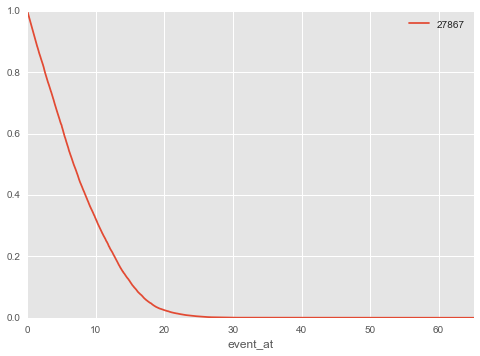

In [67]:
pred = cf.predict_survival_function(e2build[reduced_cols[:-2]].iloc[:1])
pred.plot()

## create some groupings of the categorical factors

In [44]:
e2build[e2build.EXT_FUNC_ID_SFI.isin(e2build.EXT_FUNC_ID_SFI.unique().tolist()[:10])].former.value_counts()

0    17166
1    11719
Name: former, dtype: int64

In [52]:
def restrict_values(df,col,max_number_groups=40):
    my_unique_values = df[col].unique().tolist()
    vc= df[col].value_counts()
    topk_values =vc.iloc[:(max_number_groups-1)].index.tolist()
    #map the others into a single group
    other_groups = list(set(my_unique_values)-set(topk_values))
    new_group_dict = {}
    for v in topk_values:
        new_group_dict[v]=str(v)
    for v in other_groups:
        new_group_dict[v]='base'
    return new_group_dict
    

In [54]:
reduced_EFIS_dict = restrict_values(e2build,'EXT_FUNC_ID_SFI')


['base',
 'base',
 'base',
 'base',
 '517',
 'base',
 'base',
 'base',
 'base',
 'base',
 'base',
 '534',
 'base',
 'base',
 'base',
 'base',
 'base',
 'base',
 'base',
 'base',
 'base',
 'base',
 'base',
 '62',
 '63',
 'base',
 'base',
 '66',
 '67',
 'base',
 'base',
 '70',
 '71',
 'base',
 'base',
 'base',
 'base',
 'base',
 'base',
 'base',
 'base',
 'base',
 '90',
 'base',
 'base',
 'base',
 'base',
 'base',
 'base',
 'base',
 'base',
 '101',
 'base',
 'base',
 'base',
 'base',
 'base',
 'base',
 'base',
 'base',
 'base',
 'base',
 '116',
 'base',
 '118',
 '119',
 'base',
 '121',
 'base',
 '123',
 '124',
 '125',
 'base',
 'base',
 'base',
 'base',
 'base',
 'base',
 'base',
 'base',
 'base',
 'base',
 'base',
 'base',
 'base',
 'base',
 'base',
 'base',
 'base',
 'base',
 'base',
 'base',
 'base',
 'base',
 'base',
 'base',
 'base',
 'base',
 'base',
 'base',
 'base',
 'base',
 'base',
 'base',
 'base',
 'base',
 'base',
 'base',
 'base',
 'base',
 'base',
 'base',
 'base',
 'base'

In [56]:
e2build['EXT_FUNC_ID_SFI_mod'] = e2build.EXT_FUNC_ID_SFI.apply(lambda x: reduced_EFIS_dict[x] )

C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [59]:
reduced_cols.append('EXT_FUNC_ID_SFI_mod')

In [60]:
%%time 
cf2 = CoxPHFitter()
#X = patsy.dmatrix("EXT_FUNC_ID_SFI_mod + ")
cf2.fit(e2build[reduced_cols],'Tenure_years',event_col='former',strata=['EXT_FUNC_ID_SFI_mod'])
cf2.print_summary()

n=107412, number of events=39747

                     coef  exp(coef)  se(coef)          z          p  lower 0.95  upper 0.95     
SAL1           -4.947e-01  6.098e-01 1.458e-02 -3.393e+01 2.244e-252  -5.233e-01  -4.661e-01  ***
HAVE_INS       -3.438e-01  7.091e-01 8.041e-03 -4.275e+01  0.000e+00  -3.595e-01  -3.280e-01  ***
MERIT1          1.695e-01  1.185e+00 9.024e-03  1.879e+01  9.620e-79   1.518e-01   1.872e-01  ***
PERF1          -1.081e+00  3.392e-01 1.711e-02 -6.320e+01  0.000e+00  -1.115e+00  -1.048e+00  ***
MIN_RT_ANNUAL  -2.318e-01  7.931e-01 1.270e-02 -1.825e+01  2.139e-74  -2.567e-01  -2.069e-01  ***
INTERN         -1.486e-01  8.619e-01 5.250e-03 -2.831e+01 2.804e-176  -1.589e-01  -1.383e-01  ***
BOX1           -1.555e-01  8.560e-01 7.063e-03 -2.201e+01 2.321e-107  -1.693e-01  -1.416e-01  ***
HAVE_DEP       -2.119e-01  8.090e-01 1.426e-02 -1.486e+01  5.765e-50  -2.399e-01  -1.840e-01  ***
Age_years      -1.144e+00  3.184e-01 9.823e-03 -1.165e+02  0.000e+00  -1.164e+00  -1

In [62]:
X = patsy.dmatrix("EXT_FUNC_ID_SFI_mod+SAL1+HAVE_INS-1",e2build,return_type='dataframe')
X.columns

Index([u'EXT_FUNC_ID_SFI_mod[101]', u'EXT_FUNC_ID_SFI_mod[116]',
       u'EXT_FUNC_ID_SFI_mod[118]', u'EXT_FUNC_ID_SFI_mod[119]',
       u'EXT_FUNC_ID_SFI_mod[121]', u'EXT_FUNC_ID_SFI_mod[123]',
       u'EXT_FUNC_ID_SFI_mod[124]', u'EXT_FUNC_ID_SFI_mod[125]',
       u'EXT_FUNC_ID_SFI_mod[213]', u'EXT_FUNC_ID_SFI_mod[224]',
       u'EXT_FUNC_ID_SFI_mod[262]', u'EXT_FUNC_ID_SFI_mod[264]',
       u'EXT_FUNC_ID_SFI_mod[269]', u'EXT_FUNC_ID_SFI_mod[315]',
       u'EXT_FUNC_ID_SFI_mod[328]', u'EXT_FUNC_ID_SFI_mod[332]',
       u'EXT_FUNC_ID_SFI_mod[517]', u'EXT_FUNC_ID_SFI_mod[534]',
       u'EXT_FUNC_ID_SFI_mod[62]', u'EXT_FUNC_ID_SFI_mod[63]',
       u'EXT_FUNC_ID_SFI_mod[66]', u'EXT_FUNC_ID_SFI_mod[67]',
       u'EXT_FUNC_ID_SFI_mod[70]', u'EXT_FUNC_ID_SFI_mod[71]',
       u'EXT_FUNC_ID_SFI_mod[816]', u'EXT_FUNC_ID_SFI_mod[822]',
       u'EXT_FUNC_ID_SFI_mod[835]', u'EXT_FUNC_ID_SFI_mod[892]',
       u'EXT_FUNC_ID_SFI_mod[90]', u'EXT_FUNC_ID_SFI_mod[909]',
       u'EXT_FUNC_ID_SFI_mod[910

In [63]:
%%time 
X['T']=e2build['Tenure_years']
X['E']=e2build['former']
cf3 = CoxPHFitter()
#X = patsy.dmatrix("EXT_FUNC_ID_SFI_mod + ")
cf3.fit(X,'T',event_col='E')
cf3.print_summary()

n=107412, number of events=39747

                                coef  exp(coef)  se(coef)          z         p  lower 0.95  upper 0.95     
EXT_FUNC_ID_SFI_mod[101]   2.687e-01  1.308e+00       nan        nan       nan         nan         nan     
EXT_FUNC_ID_SFI_mod[116]   2.573e-02  1.026e+00       nan        nan       nan         nan         nan     
EXT_FUNC_ID_SFI_mod[118]   6.840e-02  1.071e+00       nan        nan       nan         nan         nan     
EXT_FUNC_ID_SFI_mod[119]   2.695e-02  1.027e+00       nan        nan       nan         nan         nan     
EXT_FUNC_ID_SFI_mod[121]   4.166e-02  1.043e+00       nan        nan       nan         nan         nan     
EXT_FUNC_ID_SFI_mod[123]   1.543e-02  1.016e+00       nan        nan       nan         nan         nan     
EXT_FUNC_ID_SFI_mod[124]   4.945e-02  1.051e+00       nan        nan       nan         nan         nan     
EXT_FUNC_ID_SFI_mod[125]   2.409e-01  1.272e+00       nan        nan       nan         nan         nan

In [64]:
from lifelines import AalenAdditiveFitter
aaf3 = AalenAdditiveFitter(coef_penalizer=1.0)

In [ ]:
aaf3.fit(X,'T','E')

 [-                 3%                  ] 1449 of 39747 complete in 103.4 sec